<a href="https://colab.research.google.com/github/Aleena24/PRODIGY_ML/blob/main/PRODIGY_ML_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, load_img
import matplotlib.pyplot as plt
import string

# Load Dataset

In [ ]:
train_df = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv", delimiter=',')
test_df = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv", delimiter=',')

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
X_train, y_train = np.array(train_df.iloc[:, 1:]).reshape(-1, 28, 28).astype('float64'), np.array(train_df.label).astype('float64')
X_test, y_test = np.array(test_df.iloc[:, 1:]).reshape(-1, 28, 28).astype('float64'), np.array(test_df.label).astype('float64')

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(27455, 28, 28) (27455,)
(7172, 28, 28) (7172,)


# Prepare Dataset

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2)

train_generator = train_datagen.flow(x=np.expand_dims(X_train, axis=-1), y=y_train,
                  batch_size=32)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow(x=np.expand_dims(X_test, axis=-1), y=y_test,
                  batch_size=32)

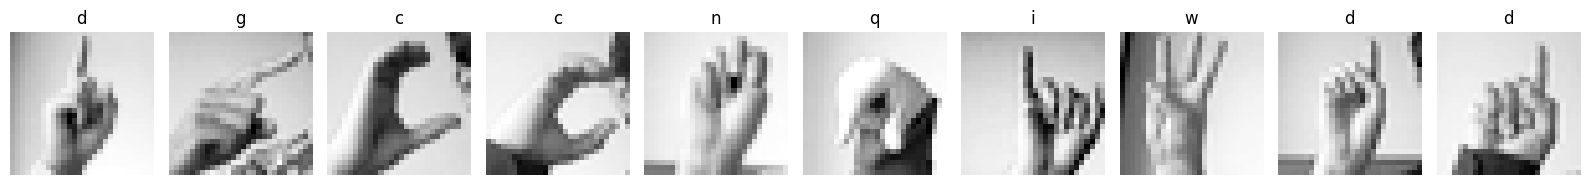

In [ ]:
# Plot a sample of 10 images from the training set
def plot_categories(training_images, training_labels):
  fig, axes = plt.subplots(1, 10, figsize=(16, 15))
  axes = axes.flatten()
  letters = list(string.ascii_lowercase)

  for k in range(10):
    img = training_images[k]
    img = np.expand_dims(img, axis=-1)
    img = array_to_img(img)
    ax = axes[k]
    ax.imshow(img, cmap="Greys_r")
    ax.set_title(f"{letters[int(training_labels[k])]}")
    ax.set_axis_off()

  plt.tight_layout()
  plt.show()

plot_categories(X_train, y_train)

# Build Model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

tf.random.set_seed(1234)

model = tf.keras.Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(25, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_34 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 25)             │         6,425 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 216,281 (844.85 KB)

 Trainable params: 216,281 (844.85 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_generator, validation_data=test_generator, epochs=15)

Epoch 1/15
 15/858 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.0260 - loss: 3.2269

W0000 00:00:1713948360.983257      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


280/858 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.0644 - loss: 3.1447

W0000 00:00:1713948367.262478      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


849/858 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1662 - loss: 2.7861

W0000 00:00:1713948374.822389      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


858/858 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.1678 - loss: 2.7803 - val_accuracy: 0.6567 - val_loss: 1.0134
Epoch 2/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.5688 - loss: 1.3191 - val_accuracy: 0.8016 - val_loss: 0.5706
Epoch 3/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.6995 - loss: 0.8923 - val_accuracy: 0.8999 - val_loss: 0.3240
Epoch 4/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.7747 - loss: 0.6706 - val_accuracy: 0.9225 - val_loss: 0.2399
Epoch 5/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8205 - loss: 0.5424 - val_accuracy: 0.9603 - val_loss: 0.1460
Epoch 6/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8484 - loss: 0.4519 - val_accuracy: 0.9619 - val_loss: 0.1208
Epoch 7/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8734 - loss: 0.3798 - val_accuracy: 0.9875 - val_loss: 0.0709
Epoch 8/15
858/858 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8881 - loss: 0.3340 - val_accurac

# Model Performance

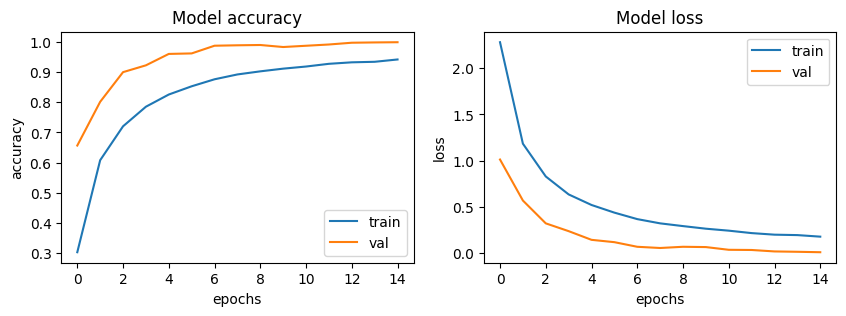

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])